#1. PERKENALAN

In [ ]:
'''
Nama  : Rugaya Muksin BSA
Batch : 006
GC    : 3
Phase : 1

'''

Source dataset: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

Dataset yang akan diolah berisi informasi mengenai pasien Cardiovascular diseases (CVDs). Gagal jantung adalah kejadian umum yang disebabkan oleh CVDs.

Orang dengan penyakit kardiovaskular atau yang berada pada risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia atau penyakit yang sudah ada) memerlukan deteksi dan manajemen dini.

**Saya akan menggunakan dataset tersebut untuk membuat model yang dapat memprediksi kematian akibat Gagal Jantung.**


#2. IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.style.use('fivethirtyeight')

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#3. DATA LOADING

In [2]:
hrt_ori = pd.read_csv ('heart_failure_clinical_records_dataset.csv')

In [3]:
hrt = hrt_ori.copy()
hrt.shape

(299, 13)

In [4]:
hrt.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#4. DATA CLEANING

In [ ]:
hrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
'''
Cek jumlah dan presentase missing value pada setiap variabel yang ada dalam
dataset.

'''

mv = pd.DataFrame(hrt.isnull().sum(), columns=['No. of missing values'])
mv['% missing_values'] = (mv/len(hrt)).round(2)*100
mv

,No. of missing values,% missing_values
age,0,0.0
anaemia,0,0.0
creatinine_phosphokinase,0,0.0
diabetes,0,0.0
ejection_fraction,0,0.0
high_blood_pressure,0,0.0
platelets,0,0.0
serum_creatinine,0,0.0
serum_sodium,0,0.0
sex,0,0.0


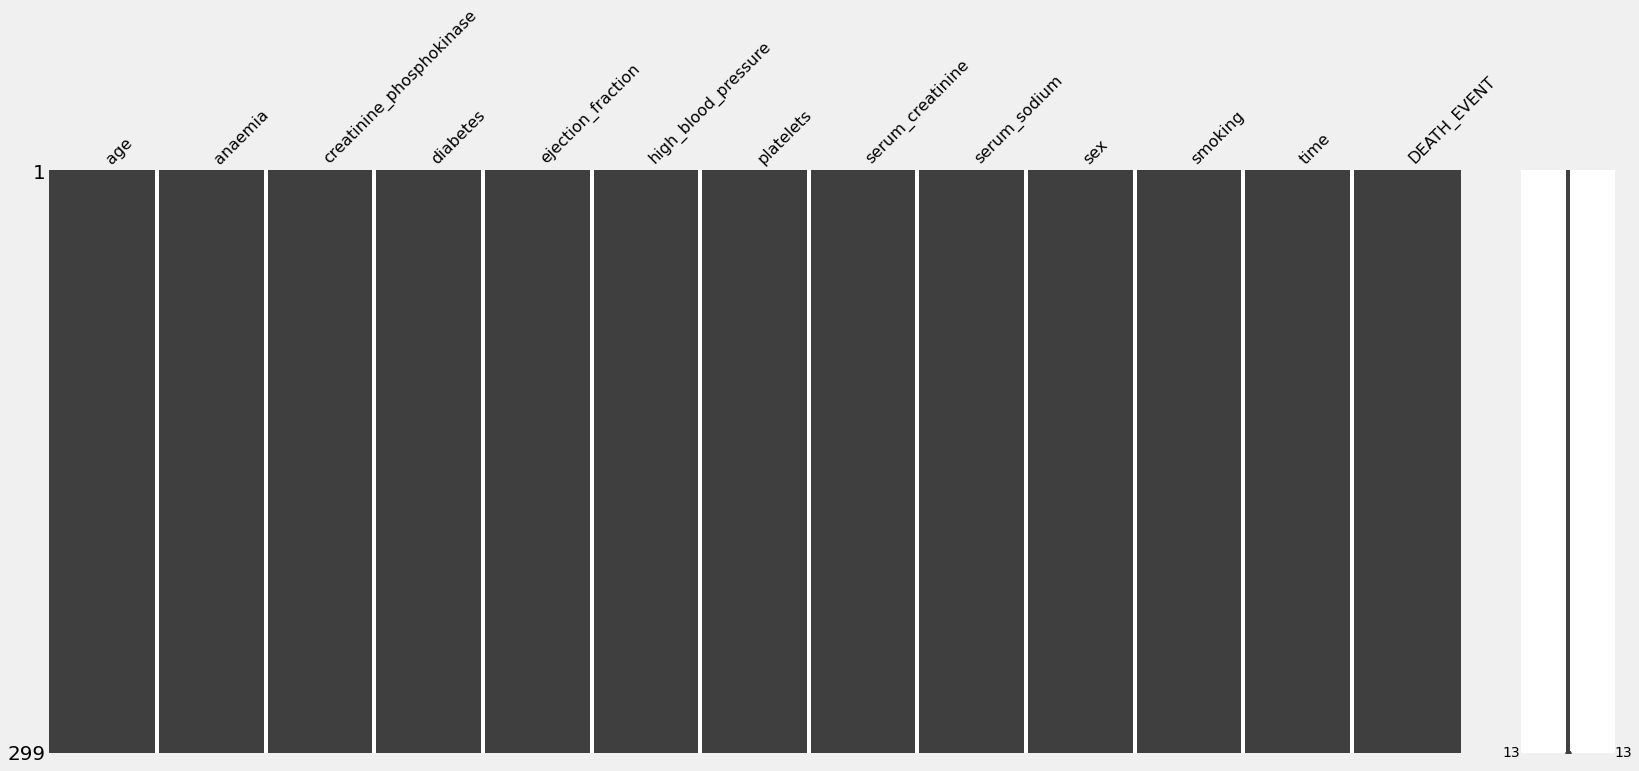

In [ ]:
import missingno as msno

msno.matrix(hrt)  # just to visualize. no missing value.

Tampaknya dataset yang akan digunakan bersih dari missing value.

#5. EDA

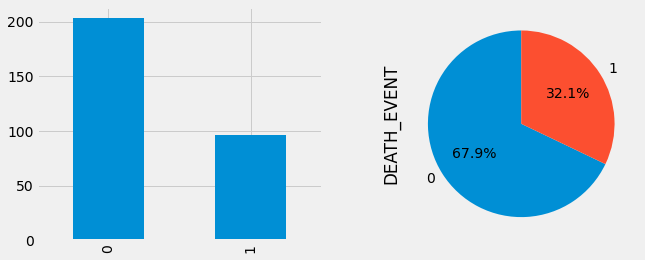

In [ ]:
'''
Visualisasi variabel target (y)

'''

fig, axs = plt.subplots(ncols=2, figsize=(10,4))
hrt['DEATH_EVENT'].value_counts().plot(kind='bar', ax=axs[0])
hrt['DEATH_EVENT'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=axs[1])

*   Target dari variabel DEATH_EVENT memiliki 2 value, yaitu 0 (No) and 1 (Yes)
*   67.9% dari hasilnya adalah No, dan 32.1% adalah Yes
*   Terlihat bahwa jumlah antara Yes dan No pada dataset tidak seimbang (imbalanced), sehingga perlu digunakan stratified agar menjaga keseimbangan data pada target.

In [5]:
countNoDisease = len(hrt[hrt.DEATH_EVENT == 0])
countHaveDisease = len(hrt[hrt.DEATH_EVENT == 1])
print("Percentage of Patients Haven't Heart Failure: {:.2f}%".format((countNoDisease / (len(hrt.DEATH_EVENT))*100)))
print("Percentage of Patients Have Heart Failure: {:.2f}%".format((countHaveDisease / (len(hrt.DEATH_EVENT))*100)))

Percentage of Patients Haven't Heart Failure: 67.89%
Percentage of Patients Have Heart Failure: 32.11%


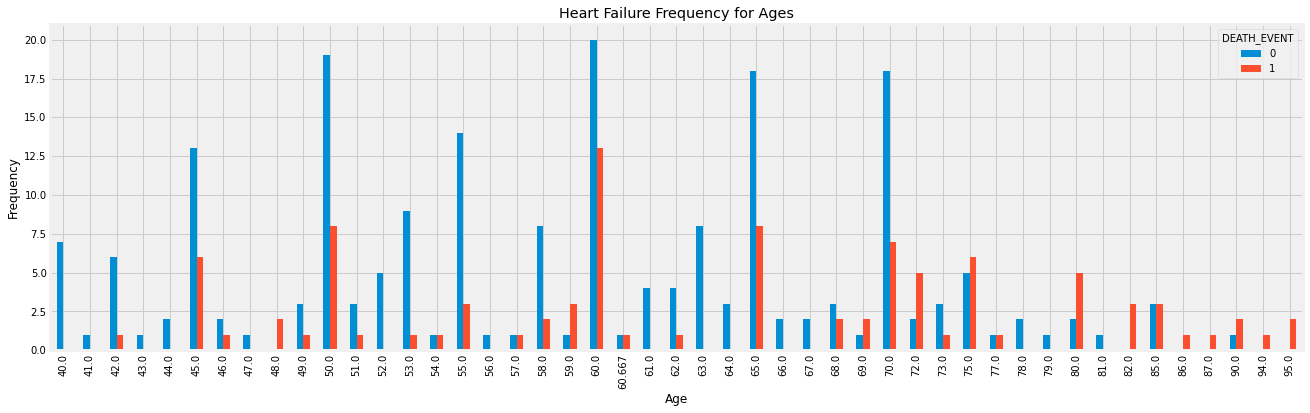

In [7]:
pd.crosstab(hrt.age,hrt.DEATH_EVENT).plot(kind="bar",figsize=(20,6))
plt.title('Heart Failure Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Pasien dengan penyakit jantung mengalami kematian pada rentang usia >= 45 tahun. **Pasien penyakit jantung diatas 45 tahun memiliki resiko kematian yang lebih besar.**

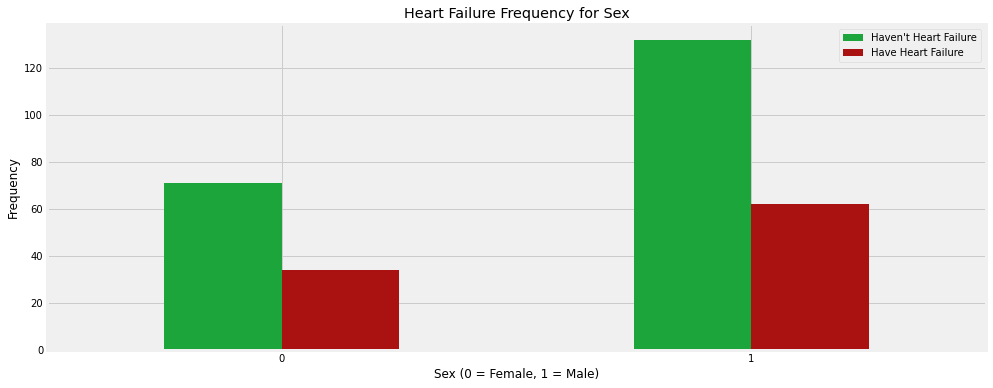

In [8]:
pd.crosstab(hrt.sex, hrt.DEATH_EVENT).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Failure Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Heart Failure", "Have Heart Failure"])
plt.ylabel('Frequency')
plt.show()

*   Pasien dengan penyakit jantung lebih banyak didominasi oleh pasien pria
*   Pasien pria dengan penyakit jantung memiliki potensi yang lebih besar dalam mengalami kematian.



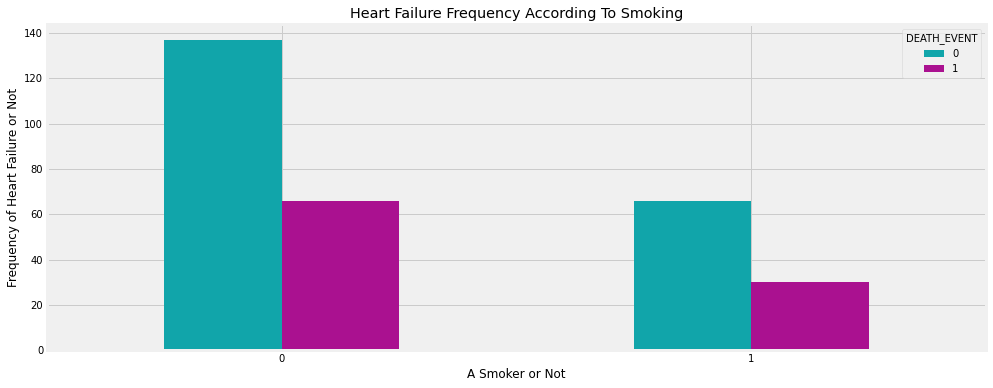

In [9]:
pd.crosstab(hrt.smoking, hrt.DEATH_EVENT).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Heart Failure Frequency According To Smoking')
plt.xlabel('A Smoker or Not')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Heart Failure or Not')
plt.show()

*   Bukan perokok lebih banyak mengalami kematian 
*   Perokok memiliki tingkat kematian lebih sedikit
*   Dalam kasus penyakit jantung status sebagai seorang perokok tidak berpengaruh dalam terjadinya kematian.





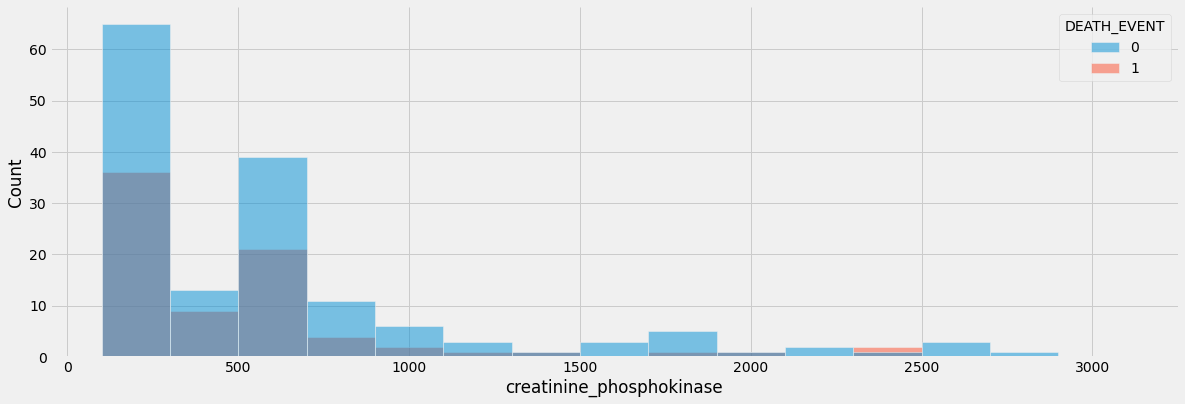

In [ ]:
bins = [100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900, 2100, 2300, 2500, 2700, 2900, 3100]
plt.figure(figsize=(18, 6))
sns.histplot(data=hrt, x="creatinine_phosphokinase", bins=bins, hue="DEATH_EVENT");
sns.despine(top=True, right=True)

**Pada kondisi normal, kadar kreatin fosfokinase tergolong rendah dalam darah. Kadarnya yang tinggi mengindikasikan adanya cedera pada jaringan otot, jantung, atau otak. Semakin tinggi creatinine maka semakin berpotensi seseorang mengalami kerusakan jantung dan semakin tinggi resiko kematian.**

Dari visualisasi terbukti bahwa pasien dengan kadar keratin fosfokinase diatas 2000 mengalami kematian.

Semakin tinggi kadar keratin fosfokinasi semakin besar resiko pasien penyakit jantung mengalami kematian.

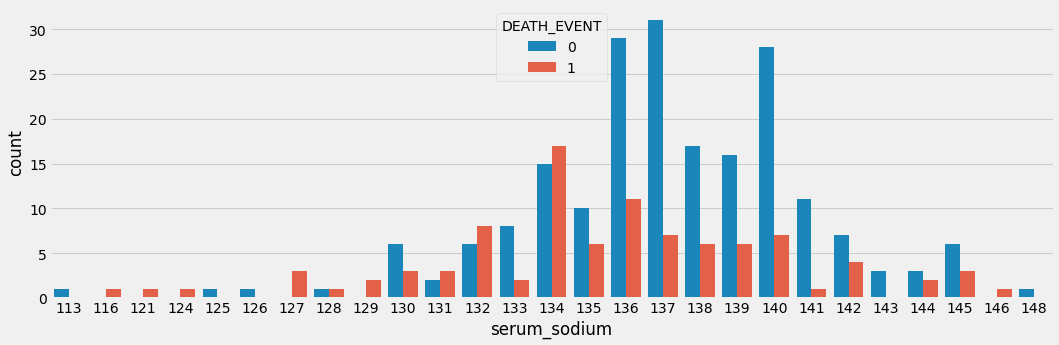

In [ ]:
plt.figure(figsize=(16, 5))
sns.countplot(data=hrt, x="serum_sodium", hue="DEATH_EVENT");
sns.despine(top=True, right=True)

**Dai-Yin Lu dkk dan Byung-Su Yoo dkk menunjukkan bahwa rendahnya kadar natrium pada darah atau kadar natrium dibawah 135 mEq/L dapat dihubungkan dengan peningkatan kematian pasien dengan gagal jantung akut.**

Dari visualisasi terbukti bahwa tinggi rendahnya kadar natrium pada darah berpengaruh dalam terjadinya kematian pada pasien penyakit jantung.

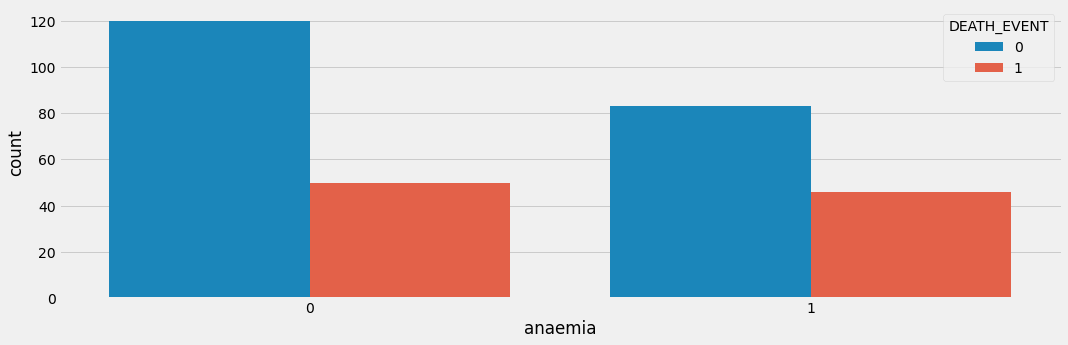

In [ ]:
plt.figure(figsize=(16, 5))
sns.countplot(data=hrt, x="anaemia", hue="DEATH_EVENT");
sns.despine(top=True, right=True)

*   Pasien penyakit jantung tanpa anemia lebih banyak mengalami kematian
*   Penyakit anemia yang diderita pasien penyakit jantung tidak berpengaruh dalam terjadinya kematian.



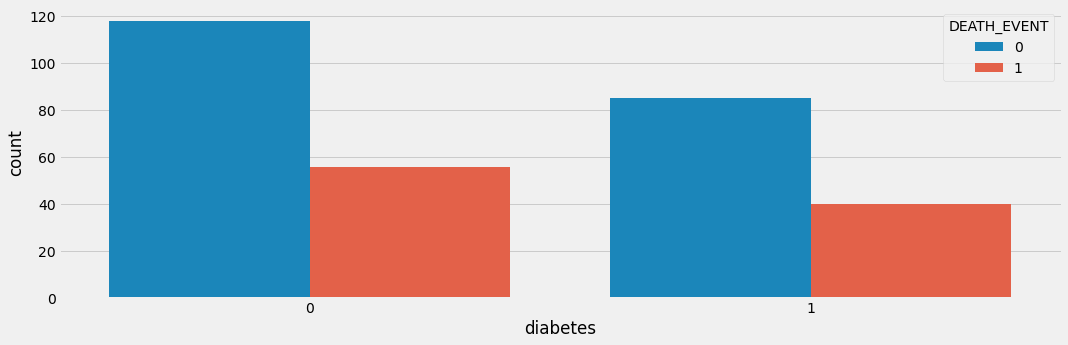

In [ ]:
plt.figure(figsize=(16, 5))
sns.countplot(data=hrt, x="diabetes", hue="DEATH_EVENT");
sns.despine(top=True, right=True)

*   Pasien penyakit jantung tanpa diabetes lebih banyak mengalami kematian
*   Penyakit diabetes yang diderita pasien penyakit jantung tidak berpengaruh dalam terjadinya kematian.

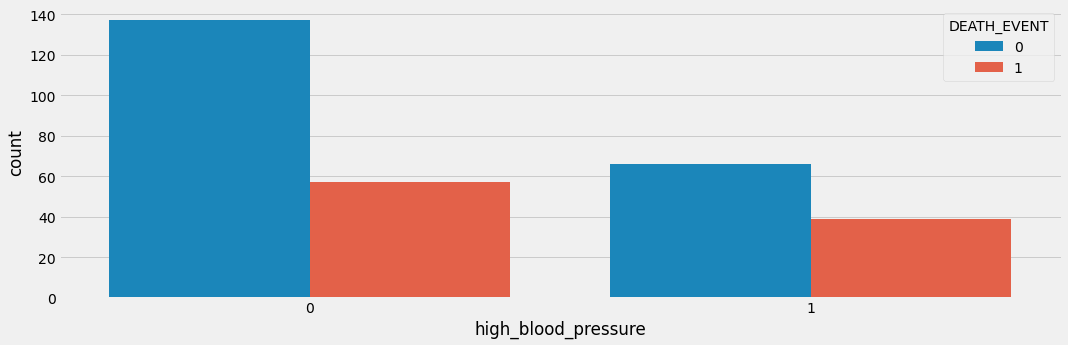

In [ ]:
plt.figure(figsize=(16, 5))
sns.countplot(data=hrt, x="high_blood_pressure", hue="DEATH_EVENT");
sns.despine(top=True, right=True)

*   Pasien penyakit jantung tanpa tekanan darah tinggi lebih banyak mengalami kematian
*   Tekanan darah tinggi yang dimiliki pasien penyakit jantung tidak berpengaruh dalam terjadinya kematian.

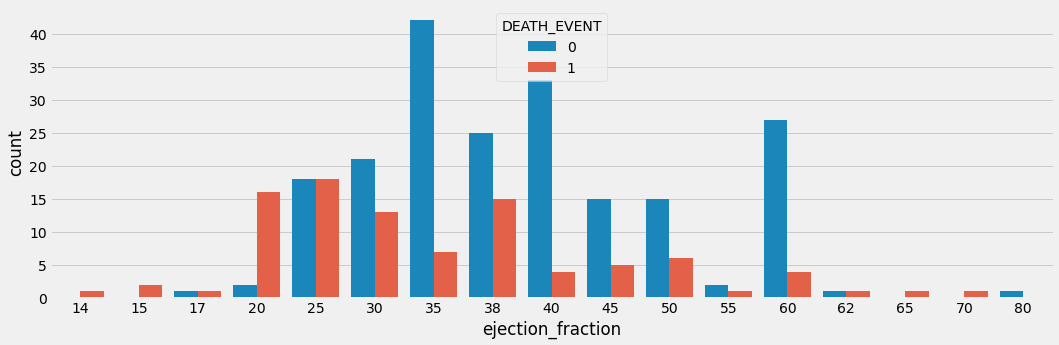

In [ ]:
plt.figure(figsize=(16, 5))
sns.countplot(data=hrt, x="ejection_fraction", hue="DEATH_EVENT");
sns.despine(top=True, right=True)

EF <40 menunjukan adanya gagal jantung atau kardiomiopati. EF 15% menunjukan adanya gagal jantung berat. Sehingga orang dengan EF 15% berisiko lebih tinggi terjadi nya gangguan irama jantung yang mengancam nyawa yang dapat menyebabkan kematian mendadak.

**Terbukti dari hasil visualisasi menunjukkan bahwa pasian dengan EF <40 mengalami kematian lebih banyak dibandingkan >= 40**

**Semakin kecil ejection_fraction, semakin besar resiko pasien jantung mengalami kematian**

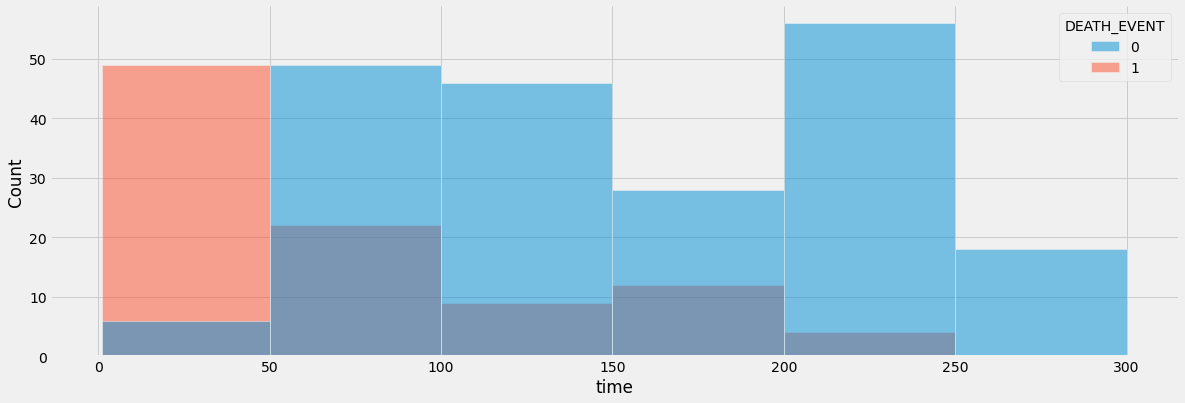

In [ ]:
bins = [1, 50, 100, 150, 200, 250, 300]
plt.figure(figsize=(18, 6))
sns.histplot(data=hrt, x="time", bins=bins, hue="DEATH_EVENT");
sns.despine(top=True, right=True)

Periode tindak lanjut memiliki pengaruh dalam terjadinya kematian. Semakin kecil periode tindak lanjut dilakukan semakin besar resiko kematian pada pasien penyakit jantung.

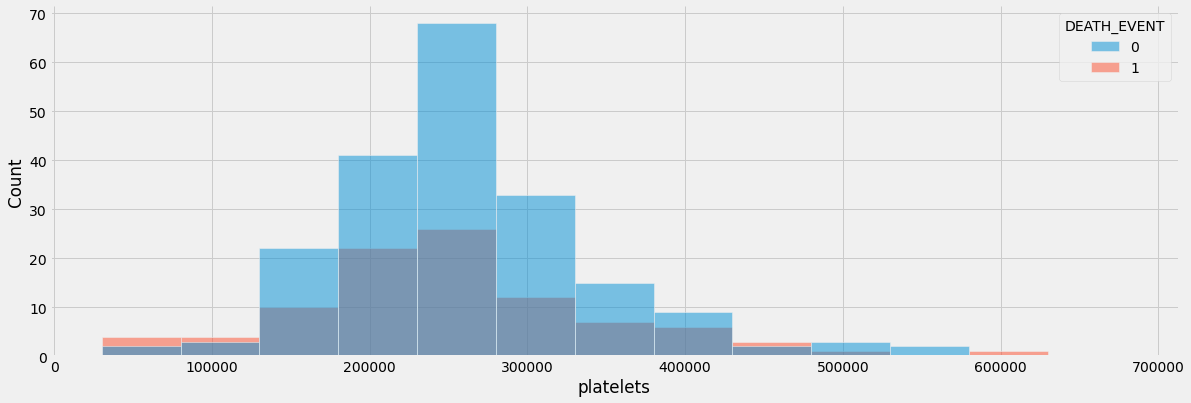

In [ ]:
bins = [30000, 80000, 130000, 180000, 230000, 280000, 330000, 380000, 430000, 480000, 530000, 580000, 630000, 680000]
plt.figure(figsize=(18, 6))
sns.histplot(data=hrt, x="platelets", bins=bins, hue="DEATH_EVENT");
sns.despine(top=True, right=True)

**Jumlah normal trombosit dalam darah manusia adalah 150.000–450.000 per mikroliter darah**. Dari visualisasi terbukti bahwa pasien dengan trombosit dibawah 150.000 dan diatas 450.000 mengalami kematian.

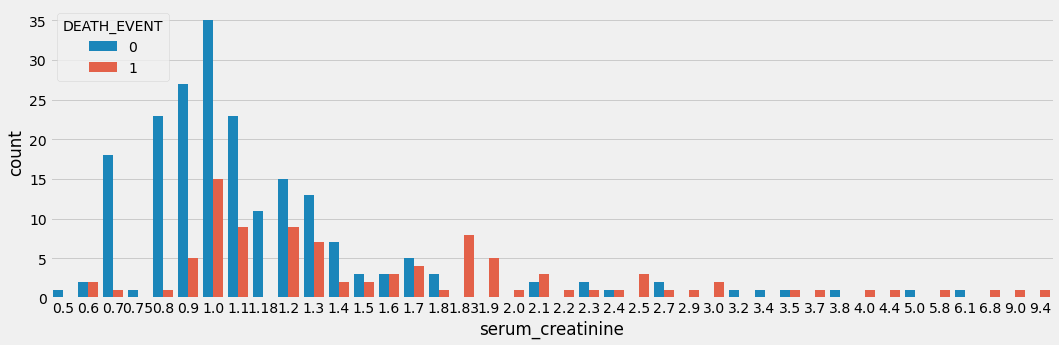

In [ ]:
plt.figure(figsize=(16, 5))
sns.countplot(data=hrt, x="serum_creatinine", hue="DEATH_EVENT");
sns.despine(top=True, right=True)

**Normal kreatinin dalam darah adalah 0.6 - 1.2 miligram per deciliter (mg/dL) untuk pria dewasa dan 0.5 - 1.1 (mg/dL) untuk wanita dewasa**. Dari visualisasi terlihat bahwa tinggi rendahnya kadar kreatinin tidak memiliki pengaruh yang besar dalam terjadinya kematian.

**KESIMPULAN ANALYSIS EDA**
---
*   Target dari variabel DEATH_EVENT memiliki 2 value, yaitu 0 (No) and 1 (Yes)
*   67.9% dari hasilnya adalah No, dan 32.1% adalah Yes
*   Terlihat bahwa jumlah antara Yes dan No pada dataset tidak seimbang (imbalanced), sehingga perlu digunakan stratified agar menjaga keseimbangan data pada target.
---
**Terjadinya kematian pada pasien penyakit jantung berdasarkan analysis EDA dipengaruhi oleh:**
*   Pasien penyakit jantung diatas 45 tahun memiliki resiko kematian yang lebih besar.
*   Pasien pria dengan penyakit jantung memiliki potensi yang lebih besar dalam mengalami kematian.
*   Semakin tinggi kadar keratin fosfokinasi semakin besar resiko pasien penyakit jantung mengalami kematian.
*   Tinggi rendahnya kadar natrium pada darah berpengaruh dalam terjadinya kematian pada pasien penyakit jantung.
*   Semakin kecil ejection_fraction, semakin besar resiko pasien jantung mengalami kematian
*   Semakin kecil periode tindak lanjut dilakukan semakin besar resiko kematian pada pasien penyakit jantung.
*   Pasien dengan trombosit dibawah 150.000 dan diatas 450.000 memiliki resiko yang sangat besar dalam mengalami kematian.










#6. PREPROCESSING DATA

###6.1 MEMISAHKAN FITUR TARGET, NUMERIK DAN NON NUMERIK (KATEGORIK)

In [ ]:
target = ['DEATH_EVENT']
cat_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
num_cols = [i for i in hrt.columns if i not in (target + cat_cols)]

###6.2 VISUALISASI DISTRIBUSI DATA PADA FITUR NUMERIK

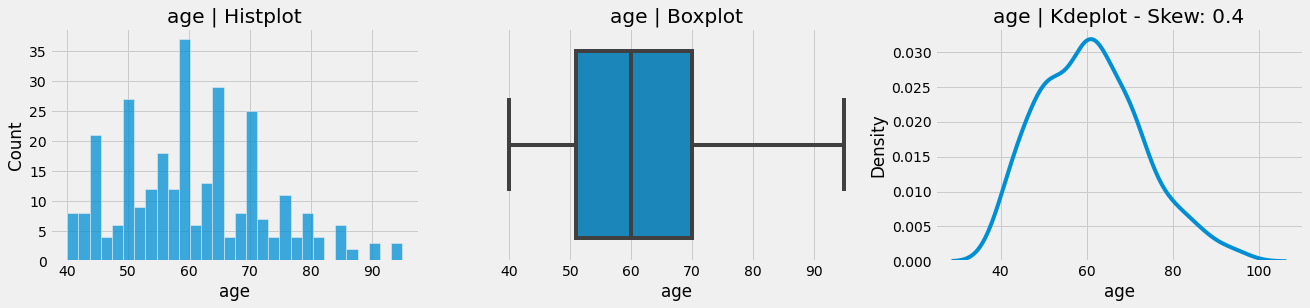

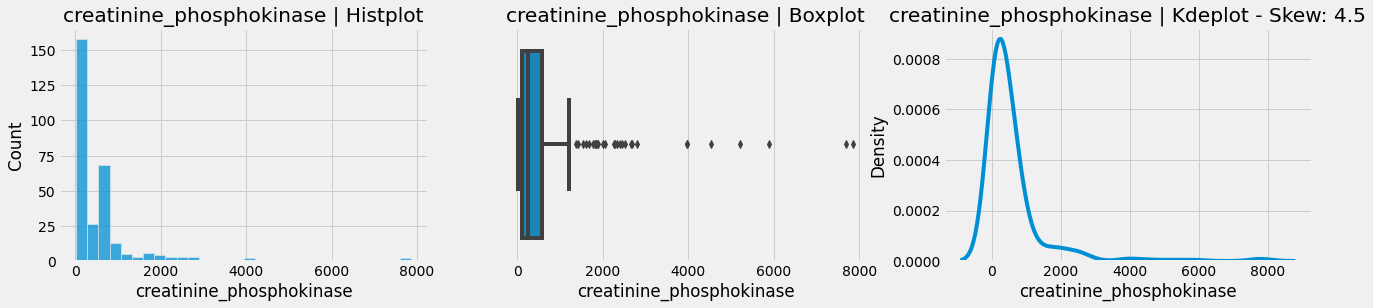

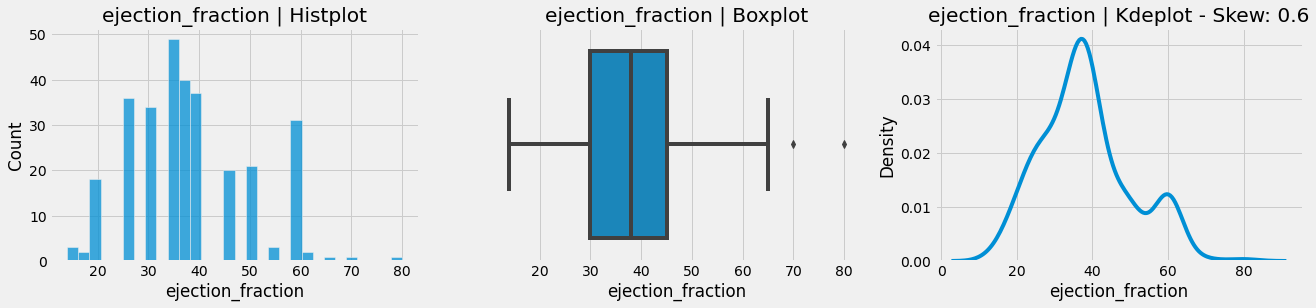

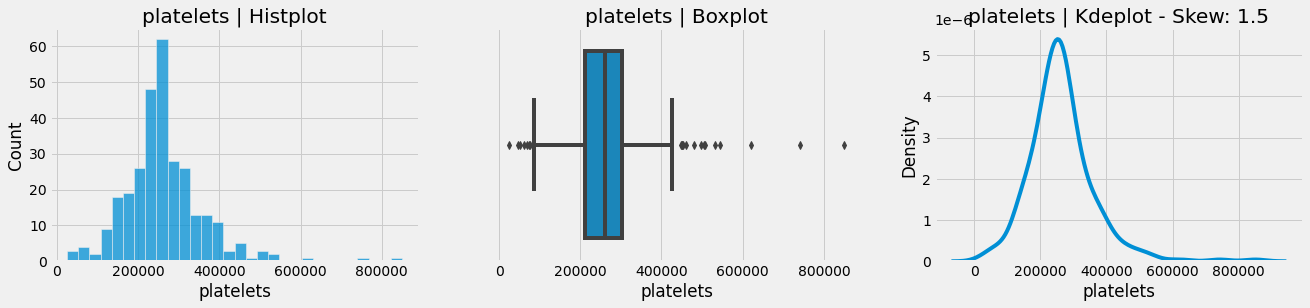

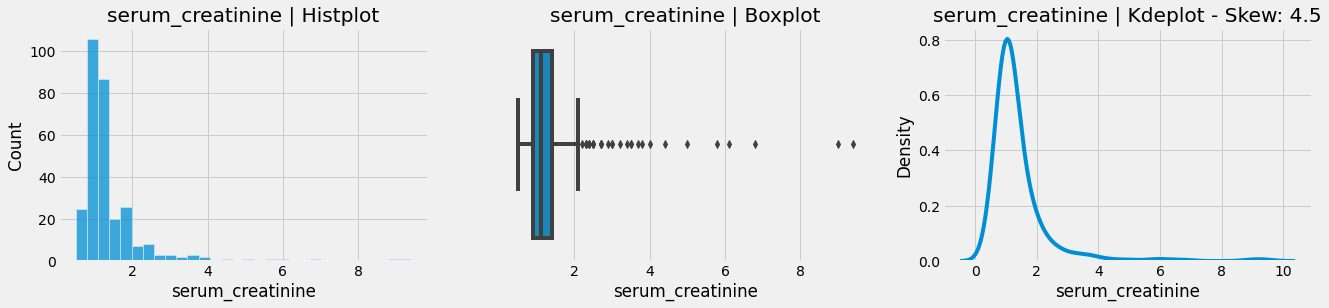

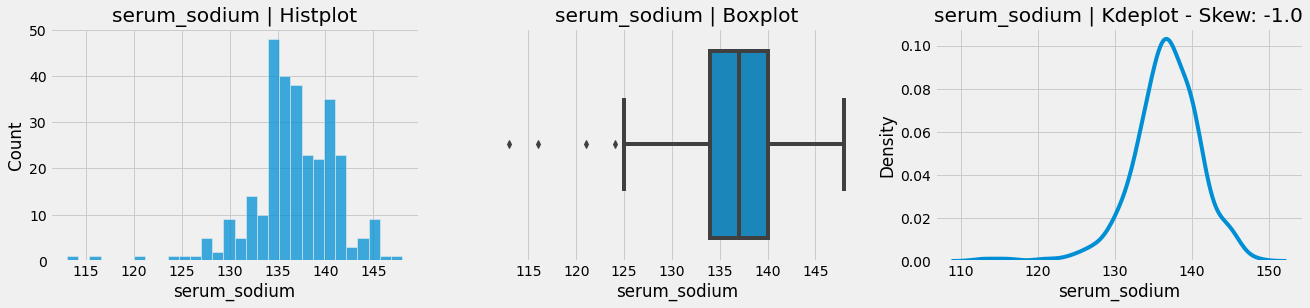

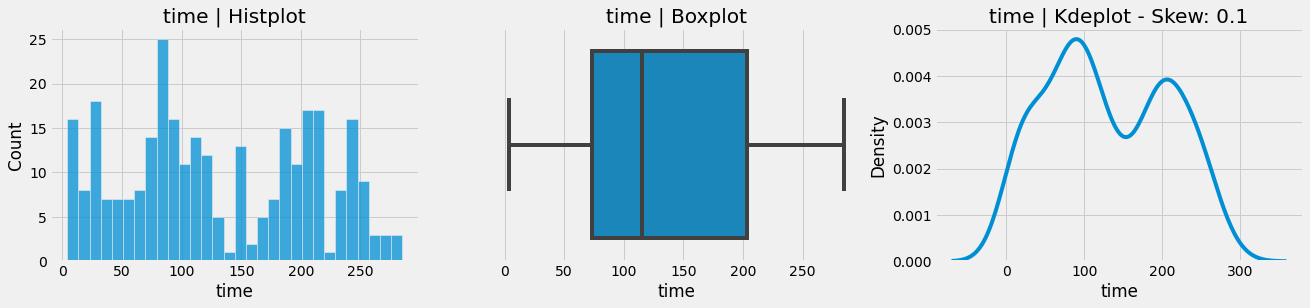

In [ ]:
'''
Melihat jenis distribusi data dan outlier dari visualisasi fitur numerik yang 
ditampilkan

'''


for i in hrt[num_cols].columns:
    fig, ax = plt.subplots(1, 3, figsize=(20,4))
    sns.histplot(x=hrt[i],ax=ax[0], bins=30)
    sns.boxplot(x=hrt[i], ax=ax[1])
    sns.kdeplot(hrt[i], ax=ax[2])
    skew_val=round(hrt[i].skew(), 1)
    ax[0].set_title(i + " | Histplot")
    ax[1].set_title(i + " | Boxplot")
    ax[2].set_title(i + " | Kdeplot - Skew: "+str(skew_val))
    plt.show()

Terdapat beberapa fitur yang memiliki distribusi data yang agak miring/skewed, beberapa fitur juga mengandung outlier. Namun karena model random forest tidak sensitif terhadap outlier sehingga handling outlier tidak perlu dilakukan.

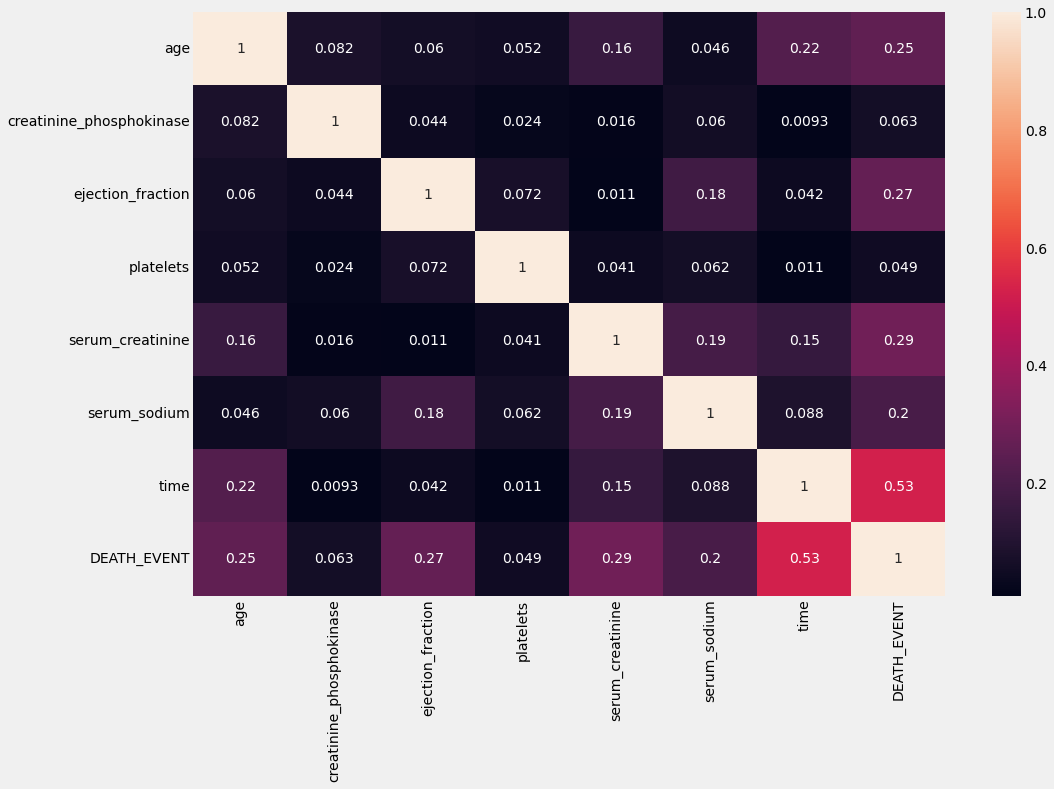

In [ ]:
'''
Heatmap untuk pengecekan correlation fitur numerik terhadap taget

'''

plt.figure(figsize=(15, 10))
sns.heatmap(hrt[num_cols + target].corr().abs(),  annot=True)
plt.show()

time, serum_creatinine, ejection_fraction, age, serum_sodium merupakan fitur yang memiliki nilai korelasi tertinggi terhadap variabel target (DEATH_EVENT)

###6.3 SPLIT DATASET

In [ ]:
X = hrt.drop('DEATH_EVENT', axis = 1)
y = hrt.DEATH_EVENT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 28)

###6.4 FEATURE SELECTION

Dari hasil heatmap terdapat beberapa fitur numerik yaitu time, serum_creatinine, ejection_fraction, age, serum_sodium yang memiliki nilai korelasi tertinggi terhadap variabel target (DEATH_EVENT). Sehingga saya memutuskan untuk menggunakan kelima fitur numerik ini.

In [ ]:
num_feature_train = X_train[num_cols].loc[:, ['time', 'serum_creatinine', 'ejection_fraction', 'age', 'serum_sodium']]
num_feature_test = X_test[num_cols].loc[:, ['time', 'serum_creatinine', 'ejection_fraction', 'age', 'serum_sodium']]

X_train_num = num_feature_train
X_test_num = num_feature_test

**Saya memutuskan untuk menggunakan hanya 1 fitur pada fitur kategorik, yaitu sex. Dikarenakan berdasarkan hasil analisis pada EDA terlihat bahwa Pasien dengan penyakit jantung lebih banyak didominasi oleh pasien pria. Pasien pria dengan penyakit jantung memiliki potensi yang lebih besar dalam mengalami kematian.**

Berdasarkan intuisi saya, nilai yang dikandung dalam fitur ini berpengaruh penting terhadap prediksi yang akan dilakukan kedapa target (DEATH_EVENT).

In [ ]:
cat_feature_train = X_train[cat_cols].loc[:, ['sex']]
cat_feature_test = X_test[cat_cols].loc[:, ['sex']]

X_train_cat = cat_feature_train
X_test_cat = cat_feature_test

In [ ]:
processed_data_train = np.concatenate([X_train_num, X_train_cat], axis=1)
X_train = processed_data_train

In [ ]:
processed_data_test = np.concatenate([X_test_num, X_test_cat], axis=1)
X_test = processed_data_test

In [ ]:
'''
Sebelum masuk ke pemodelan saya akan convert terlebih dahulu fitur kategorik
dengan LabelEncoder agar memudahkan dalam handling outlier

'''
from sklearn.preprocessing import LabelEncoder

# Convert categorized values to numerical values
le = LabelEncoder()
X[cat_cols] = X[cat_cols].astype('str').apply(le.fit_transform)

#7. PIPELINE DAN PARAMETER TUNING

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

pipe_rf = Pipeline([
('scaler', StandardScaler()),
('classifier', RandomForestClassifier())])

pipe_gbk = Pipeline([
('scaler', StandardScaler()),
('classifier', GradientBoostingClassifier())])

pipe_ada = Pipeline([
('scaler', StandardScaler()),
('classifier', AdaBoostClassifier())])

#Random Forest
param_rf = {'scaler': [StandardScaler(),MinMaxScaler()],
            'classifier__max_depth': [10, 50, 100],
            'classifier__max_features': [2, 3],
            'classifier__min_samples_leaf': [3, 4, 5],
            'classifier__min_samples_split': [8, 10, 12],
            'classifier__n_estimators': [100, 200, 300]
            }

param_gbk = {'scaler': [StandardScaler(),MinMaxScaler()],
            'classifier__learning_rate':[0.1,0.01,0.001],
            'classifier__min_samples_split': [50, 100, 200],
            'classifier__min_samples_leaf': [3, 4, 5],
            'classifier__max_depth': [8, 10, 12],
            'classifier__max_features': [2, 3],
            'classifier__n_estimators':np.arange(100, 501, 100)
            }

param_ada = {'scaler': [StandardScaler(),MinMaxScaler()],
            'classifier__learning_rate':[0.1, 0.01, 0.001],
            'classifier__n_estimators':np.arange(100, 501, 100)
            }

#8. RANDOM FOREST

###8.1 Tanpa Tunning Model

In [ ]:
pipe_rf.fit(X_train, y_train)
print('Training Score: ',round(pipe_rf.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_rf.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  0.8333


In [ ]:
y_rf_pred = pipe_rf.predict(X_test)

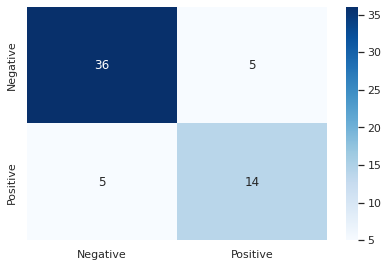

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

cf_matrix_rf = confusion_matrix(y_test, y_rf_pred)
sns.set(rc={'figure.figsize':(6,4)})

ax = sns.heatmap(cf_matrix_rf, annot = True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negative", "Positive"])
ax.set_yticklabels(["Negative", "Positive"])
plt.show()

###8.2 Tunning Model

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_rf = GridSearchCV(pipe_rf, param_rf, cv=5).fit(X_train, y_train)

In [ ]:
print('Training set score: ' + str(grid_rf.score(X_train, y_train)))
print('Test set score: ' + str(grid_rf.score(X_test, y_test)))

Training set score: 0.9330543933054394
Test set score: 0.8166666666666667


In [ ]:
# Access the best set of parameters
best_params_rf = grid_rf.best_params_
print(best_params_rf)

# simpan optimum model
best_pipe_rf = grid_rf.best_estimator_
print(best_pipe_rf)
 
result_df_rf = pd.DataFrame.from_dict(grid_rf.cv_results_, orient='columns')
print(result_df_rf.columns)

{'classifier__max_depth': 10, 'classifier__max_features': 2, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 8, 'classifier__n_estimators': 100, 'scaler': MinMaxScaler()}
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=10, max_features=2,
                                        min_samples_leaf=4,
                                        min_samples_split=8))])
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__max_depth', 'param_classifier__max_features',
       'param_classifier__min_samples_leaf',
       'param_classifier__min_samples_split', 'param_classifier__n_estimators',
       'param_scaler', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')


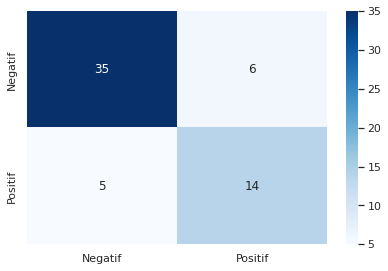

In [ ]:
# Cek confusion matrix
cf_matrix_rf = confusion_matrix(y_test, best_pipe_rf.predict(X_test))

# figure size
sns.set(rc={'figure.figsize':(6,4)})

#plotting confusion matrix
ax = sns.heatmap(cf_matrix_rf, annot=True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.show()

In [ ]:
print(classification_report(y_test, best_pipe_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        41
           1       0.70      0.74      0.72        19

    accuracy                           0.82        60
   macro avg       0.79      0.80      0.79        60
weighted avg       0.82      0.82      0.82        60



#9. ADABOOST CLASSIFIER

###9.1 Tanpa Tunning Model

In [ ]:
pipe_ada.fit(X_train, y_train)
print('Training Score: ',round(pipe_ada.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_ada.score(X_test, y_test),4))

Training Score:  0.9582
Testing Score:  0.8167


In [ ]:
y_ada_pred = pipe_ada.predict(X_test)

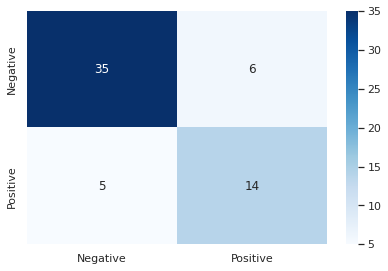

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

cf_matrix_ada = confusion_matrix(y_test, y_ada_pred)
sns.set(rc={'figure.figsize':(6,4)})

ax = sns.heatmap(cf_matrix_rf, annot = True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negative", "Positive"])
ax.set_yticklabels(["Negative", "Positive"])
plt.show()

###9.2 Tunning Model

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_ada = GridSearchCV(pipe_ada, param_ada, cv=5).fit(X_train, y_train)

In [ ]:
print('Training set score: ' + str(grid_ada.score(X_train, y_train)))
print('Test set score: ' + str(grid_ada.score(X_test, y_test)))

Training set score: 0.891213389121339
Test set score: 0.8166666666666667


In [ ]:
# Access the best set of parameters
best_params_ada = grid_ada.best_params_
print(best_params_ada)

# simpan optimum model
best_pipe_ada = grid_ada.best_estimator_
print(best_pipe_ada)
 
result_df_ada = pd.DataFrame.from_dict(grid_ada.cv_results_, orient='columns')
print(result_df_ada.columns)

{'classifier__learning_rate': 0.01, 'classifier__n_estimators': 500, 'scaler': StandardScaler()}
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 AdaBoostClassifier(learning_rate=0.01, n_estimators=500))])
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__learning_rate', 'param_classifier__n_estimators',
       'param_scaler', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')


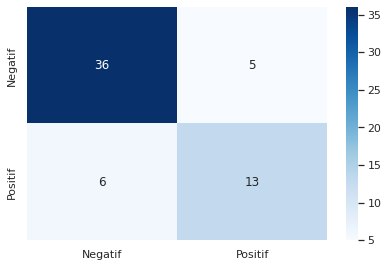

In [ ]:
# Cek confusion matrix
cf_matrix_ada = confusion_matrix(y_test, best_pipe_ada.predict(X_test))

# figure size
sns.set(rc={'figure.figsize':(6,4)})

#plotting confusion matrix
ax = sns.heatmap(cf_matrix_ada, annot=True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.show()

In [ ]:
print(classification_report(y_test, best_pipe_ada.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.72      0.68      0.70        19

    accuracy                           0.82        60
   macro avg       0.79      0.78      0.79        60
weighted avg       0.81      0.82      0.82        60



#10. GRADIENT BOOSTING CLASSIFIER

###10.1 Tanpa Tunning Model

In [ ]:
pipe_gbk.fit(X_train, y_train)
print('Training Score: ',round(pipe_gbk.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_gbk.score(X_test, y_test),4))

Training Score:  0.9958
Testing Score:  0.8167


In [ ]:
y_gbk_pred = pipe_gbk.predict(X_test)

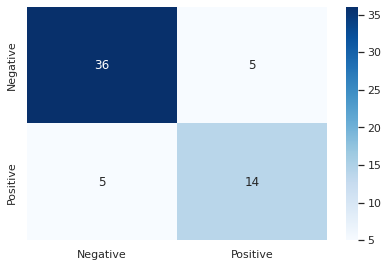

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

cf_matrix_rf = confusion_matrix(y_test, y_rf_pred)
sns.set(rc={'figure.figsize':(6,4)})

ax = sns.heatmap(cf_matrix_rf, annot = True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negative", "Positive"])
ax.set_yticklabels(["Negative", "Positive"])
plt.show()

###10.2 Tunning Model

In [ ]:
grid_gbk = GridSearchCV(pipe_gbk, param_gbk, cv=5).fit(X_train, y_train)

In [ ]:
print('Training set score: ' + str(grid_gbk.score(X_train, y_train)))
print('Test set score: ' + str(grid_gbk.score(X_test, y_test)))

Training set score: 0.891213389121339
Test set score: 0.7833333333333333


In [ ]:
# Access the best set of parameters
best_params_gbk = grid_gbk.best_params_
print(best_params_gbk)

# simpan optimum model
best_pipe_gbk = grid_gbk.best_estimator_
print(best_pipe_gbk)
 
result_df_gbk = pd.DataFrame.from_dict(grid_gbk.cv_results_, orient='columns')
print(result_df_gbk.columns)

{'classifier__learning_rate': 0.01, 'classifier__max_depth': 8, 'classifier__max_features': 2, 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 100, 'classifier__n_estimators': 100, 'scaler': StandardScaler()}
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=8,
                                            max_features=2, min_samples_leaf=3,
                                            min_samples_split=100))])
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__learning_rate', 'param_classifier__max_depth',
       'param_classifier__max_features', 'param_classifier__min_samples_leaf',
       'param_classifier__min_samples_split', 'param_classifier__n_estimators',
       'param_scaler', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_

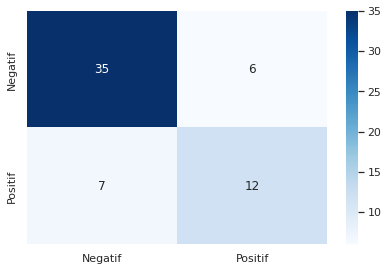

In [ ]:
# Cek confusion matrix
cf_matrix_gbk = confusion_matrix(y_test, best_pipe_gbk.predict(X_test))

# figure size
sns.set(rc={'figure.figsize':(6,4)})

#plotting confusion matrix
ax = sns.heatmap(cf_matrix_gbk, annot=True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.show()

In [ ]:
print(classification_report(y_test, best_pipe_gbk.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        41
           1       0.67      0.63      0.65        19

    accuracy                           0.78        60
   macro avg       0.75      0.74      0.75        60
weighted avg       0.78      0.78      0.78        60



#11. PERBANDINGAN MODEL

In [ ]:
rf_notun = pipe_gbk.score(X_test, y_test)
rf = grid_rf.score(X_test, y_test)
ada_notun = pipe_ada.score(X_test, y_test)
ada = grid_ada.score(X_test, y_test)
gbk_notun = pipe_gbk.score(X_test, y_test)
gbk = grid_gbk.score(X_test, y_test)

In [ ]:
print(round(rf_notun, 4))
print(round(rf, 4))
print(round(ada_notun, 4))
print(round(ada, 4))
print(round(gbk_notun, 4))
print(round(gbk, 4))

0.8167
0.8167
0.8167
0.8167
0.8167
0.7833


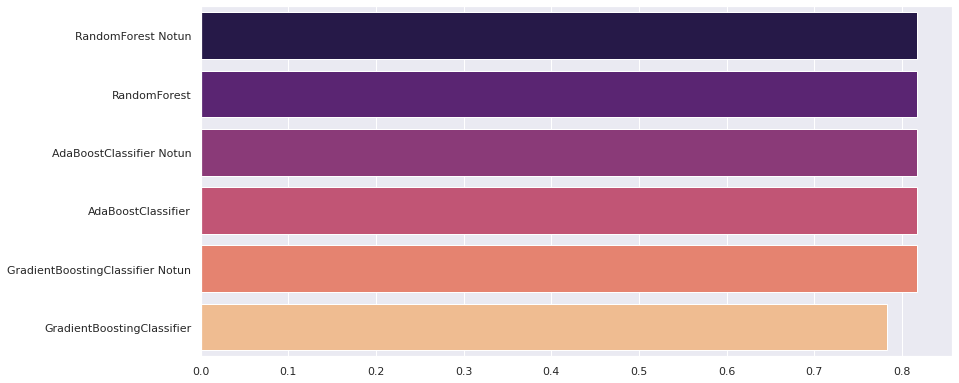

In [ ]:
plt.figure(figsize=(12,6))
model_acc = [rf_notun, rf, ada_notun, ada, gbk_notun, gbk]
model_name = ['RandomForest Notun', 'RandomForest', 'AdaBoostClassifier Notun', 'AdaBoostClassifier', 'GradientBoostingClassifier Notun', 'GradientBoostingClassifier']
sns.barplot(x= model_acc, y=model_name, palette='magma')

In [ ]:
from sklearn.metrics import f1_score, recall_score

models = {
    'rf_notun': pipe_rf,
    'rf': best_pipe_rf,
    'ada_notun': pipe_ada,
    'ada': best_pipe_ada,
    'gbk_notun': pipe_gbk,
    'gbk': best_pipe_gbk,
}
metrics = {
    'f1_score':f1_score,
    'recall':recall_score
}

hrt_model = pd.DataFrame(columns=models.keys(), index=['f1_score','recall'])

for metric in metrics.keys():
    for model in models.keys():
        hrt_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [ ]:
hrt_model

,rf_notun,rf,ada_notun,ada,gbk_notun,gbk
f1_score,0.736842,0.717949,0.744186,0.702703,0.731707,0.648649
recall,0.736842,0.736842,0.842105,0.684211,0.789474,0.631579


Dari hasil f1score dan recall setiap model, menunjukkan bahwa aplikasi parameter tunning tidak selalu menghasilkan nilai yang lebih tinggi dari base model.

Namun aplikasi parameter tuning meningkatkan performansi model lebih baik mendekati good fit dan meminimalisir dari overfit.

#12. MODEL INFERENCE

In [ ]:
from sklearn.utils import shuffle

In [ ]:
hrt_inf = shuffle(hrt)
hrt_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
262,65.0,1,258,1,25,0,198000.00,1.40,129,1,0,235,1
135,75.0,0,582,0,40,0,263358.03,1.18,137,1,0,107,0
129,53.0,1,270,1,35,0,227000.00,3.40,145,1,0,105,0
88,44.0,0,84,1,40,1,235000.00,0.70,139,1,0,79,0
140,80.0,0,805,0,38,0,263358.03,1.10,134,1,0,109,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,41.0,0,148,0,40,0,374000.00,0.80,140,1,1,68,0
203,60.0,0,59,0,25,1,212000.00,3.50,136,1,1,187,0
55,95.0,1,371,0,30,0,461000.00,2.00,132,1,0,50,1
36,90.0,1,60,1,50,0,226000.00,1.00,134,1,0,30,1


In [ ]:
X_inf = hrt_inf.loc[:, ['time', 'serum_creatinine', 'ejection_fraction', 'age', 'serum_sodium', 'sex']]
y_inf = hrt_inf['DEATH_EVENT']

###12.1 RANDOM FOREST INFERENCE

In [ ]:
best_pipe_rf.fit(X_inf, y_inf)
print('Score: ',round(best_pipe_rf.score(X_inf, y_inf),4))

Score:  0.9197


In [ ]:
y_inv_pred = best_pipe_rf.predict(X_inf)
y_inv_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
yes = 0
no = 0
for i in y_inv_pred:
  if i == 'Yes':
    yes+=1
  else:
    no+=1
print('yes precentage:', round(yes/len(y_inv_pred),2)*100, '%')
print('no precentage:', round(no/len(y_inv_pred),2)*100, '%')

yes precentage: 0.0 %
no precentage: 100.0 %


###12.2 GRADIENT BOOST INFERENCE

In [ ]:
best_pipe_gbk.fit(X_inf, y_inf)
print('Score: ',round(best_pipe_gbk.score(X_inf, y_inf),4))

Score:  0.8763


In [ ]:
y_inv_pred = best_pipe_gbk.predict(X_inf)
y_inv_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
yes = 0
no = 0
for i in y_inv_pred:
  if i == 'Yes':
    yes+=1
  else:
    no+=1
print('yes precentage:', round(yes/len(y_inv_pred),2)*100, '%')
print('no precentage:', round(no/len(y_inv_pred),2)*100, '%')

yes precentage: 0.0 %
no precentage: 100.0 %


###12.3 ADABOOST INFERENCE

In [ ]:
best_pipe_ada.fit(X_inf, y_inf)
print('Score: ',round(best_pipe_ada.score(X_inf, y_inf),4))

Score:  0.8829


In [ ]:
y_inv_pred = best_pipe_ada.predict(X_inf)
y_inv_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
yes = 0
no = 0
for i in y_inv_pred:
  if i == 'Yes':
    yes+=1
  else:
    no+=1
print('yes precentage:', round(yes/len(y_inv_pred),2)*100, '%')
print('no precentage:', round(no/len(y_inv_pred),2)*100, '%')

yes precentage: 0.0 %
no precentage: 100.0 %


#13. KESIMPULAN

###13.1 MODEL ANALYSIS

Dari project yang saya buat terdapat beberapa fitur numerik yang berkolerasi tinggi (+0.20) yaitu:

1. time 
2. serum_creatinine
3. ejection_fraction
4. age
5. serum_sodium
6. sex


---

Dari 6 fitur tersebut kemudian saya membuat beberapa model dan melakukan GridSearchCV (cv = 5) dengan beberapa parameter:
1. Random Forest Classifier
    - Best Parameters = (max_depth = 10, max_features = 2, min_samples_leaf = 4, min_samples_split = 8, n_estimator = 100, MinMaxScaler dan yang lainnya default)
    - Accuracy = Training set score: 0.9330 dan Test set score: 0.8166
2. AdaBoost Classifier
    - Best Parameters = (learning_rate = 0.01, n_estimators = 500, StandardScaler dan yang lainnya default)
    - Accuracy = Training set score: 0.8912 dan Test set score: 0.8166
3. Gradient Boosting Classifier
    - Best Parameters = (learning_rate = 0.01, max_depth = 8, max_features = 2, min_samples_leaf = 3, min_samples_split = 100, n_estimators = 100, StandardScaler dan yang lainnya default)
    - Accuracy = Training set score: 0.8912 dan Test set score: 0.7833

###13.2 BEST MODEL FOR THIS CASE

Untuk perbandingan model terbaik, saya memutuskan menggunakan f1score dan recall, karena:


*   Saya memutuskan menggunakan f1score sebagai pembanding dibandingkan akurasi dikarenakan data yang kita punya merupakan imbalanced data sehingga jumlah data FP dan FN tidak simetrik.

*   Saya memutuskan menggunakan recall sebagai pembanding dibandingkan precision dikarenakan menurut saya dalam kasus ini FP lebih baik terjadi dibandingkan FN. Lebih baik algoritma klasifikasi memprediksi pasien akan mengalami kematian tetapi sebenarnya tidak, daripada algoritma sudah memprediksi pasien tidak berpotensi mengalami kematian pada sebenarnya berpotensi mengalami kematian

In [ ]:
hrt_model

,rf_notun,rf,ada_notun,ada,gbk_notun,gbk
f1_score,0.736842,0.717949,0.744186,0.702703,0.731707,0.648649
recall,0.736842,0.736842,0.842105,0.684211,0.789474,0.631579


Sehingga model yang terbaik adalah AdaBoost Classifier **tanpa tunning** dengan F1-Score dan Recall yang lebih tinggi. 

###13.3 EDA ANALYSIS

**KESIMPULAN ANALYSIS EDA**
---
*   Target dari variabel DEATH_EVENT memiliki 2 value, yaitu 0 (No) and 1 (Yes)
*   67.9% dari hasilnya adalah No, dan 32.1% adalah Yes
*   Terlihat bahwa jumlah antara Yes dan No pada dataset tidak seimbang (imbalanced), sehingga perlu digunakan stratified agar menjaga keseimbangan data pada target.
---
**Terjadinya kematian pada pasien penyakit jantung berdasarkan analysis EDA dipengaruhi oleh:**
*   Pasien penyakit jantung diatas 45 tahun memiliki resiko kematian yang lebih besar.
*   Pasien pria dengan penyakit jantung memiliki potensi yang lebih besar dalam mengalami kematian.
*   Semakin tinggi kadar keratin fosfokinasi semakin besar resiko pasien penyakit jantung mengalami kematian.
*   Tinggi rendahnya kadar natrium pada darah berpengaruh dalam terjadinya kematian pada pasien penyakit jantung.
*   Semakin kecil ejection_fraction, semakin besar resiko pasien jantung mengalami kematian
*   Semakin kecil periode tindak lanjut dilakukan semakin besar resiko kematian pada pasien penyakit jantung.
*   Pasien dengan trombosit dibawah 150.000 dan diatas 450.000 memiliki resiko yang sangat besar dalam mengalami kematian.








